In [1]:
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

#import warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Will Drop prospect ID as its just used for identification

In [8]:
df = df.drop(['Prospect ID'], 1)

In [9]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
df.shape

(9240, 36)

In [11]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [12]:
for col in df.columns:
    if df[col].isnull().sum()>3500:
        df.drop(col, 1, inplace=True)

In [13]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
#checking percentage of null values in each column
round(100*df.isnull().mean().sort_values(ascending= False),2)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free cop

In [15]:
df["City"].value_counts(dropna= False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# As 'Select' and 'NaN' (both are equivalent to null values) both are contributing more than 50% values hence, we are dropping city column

In [17]:
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
df['City']= df['City'].replace('Select',np.nan)

In [19]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
df['City'].fillna(df.City.mode()[0],inplace = True)

In [21]:
df['Tags'] = df['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
df['Tags'] = df['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df['Tags'] = df['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df['Tags'] = df['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [22]:
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in 

In [23]:
df['Tags'] = df['Tags'].replace(np.nan,'Others')

In [24]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [26]:
# Since, NaN values are more than 30%. Hence, we are dropping 'Country' column

In [27]:
df.drop(["Country"],axis=1, inplace=True)

In [28]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
round(100*df.isnull().mean().sort_values(ascending= False),2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

# Visualising the features with select values

In [30]:
def countplot(x, fig):
    
    sns.countplot(df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

<Figure size 1500x1000 with 0 Axes>

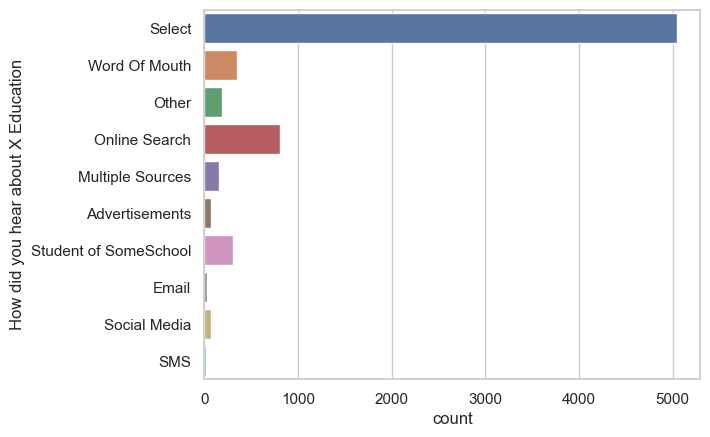

<Figure size 1500x1000 with 0 Axes>

In [31]:
sns.countplot(y='How did you hear about X Education',data=df)

plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

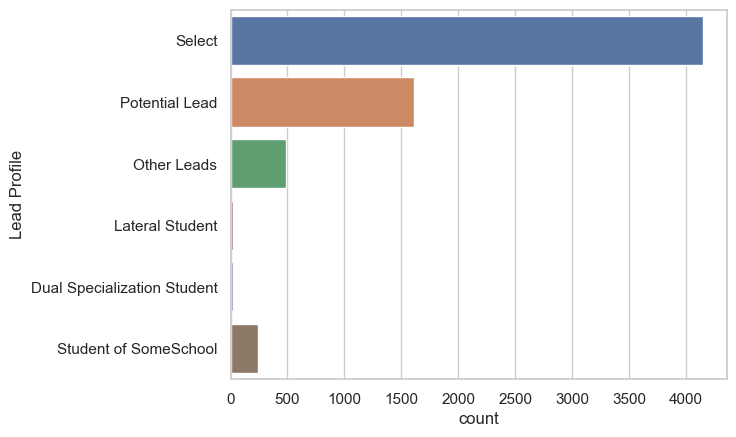

<Figure size 1500x1000 with 0 Axes>

In [32]:
sns.countplot(y='Lead Profile',data=df)
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

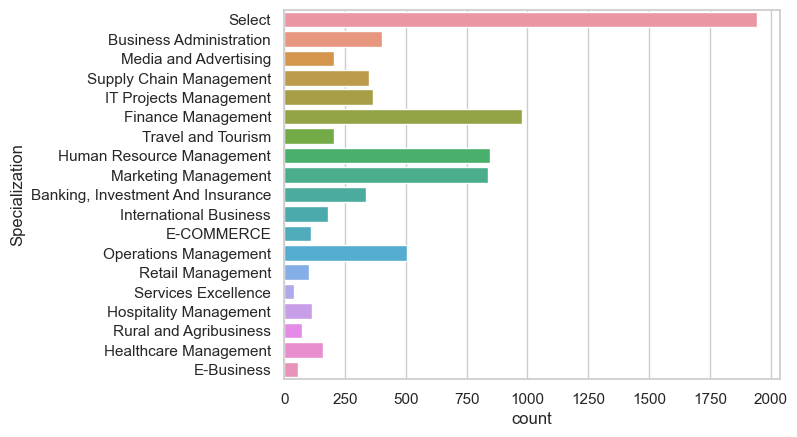

<Figure size 1500x1000 with 0 Axes>

In [33]:
sns.countplot(y='Specialization',data=df)

plt.figure(figsize=(15,10))

In [34]:
# Above two variables i.e "Lead profile" & "How did you hear about X Education" have 'Select' values which is equivalent to Null values. Hence, we are dropping these from the analysis.

In [35]:
df.drop(["Lead Profile", "How did you hear about X Education"],axis=1,inplace=True)

In [36]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
# Since following columns are not of any use in our analysis as they contain only value "No". Hence we are removing the following columns 'do not call', 'Search', 'Magazine', 'Newspaper article', 'X Education forum', 'Newspaper', 'DIgital advertisement', 'Through recommendation', 'Recieve more updates about our courses', 'update me on supply chain content', 'get updates on DM content', 'I Agree to pay the amount through cheque'.

In [38]:
df.drop(['Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'],axis=1,inplace=True)

In [39]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
#Checking Data imbalance exists or not
round(((sum(df['Converted'])/len(df.index))*100),2)

38.54

# Analysing Numerical Columns

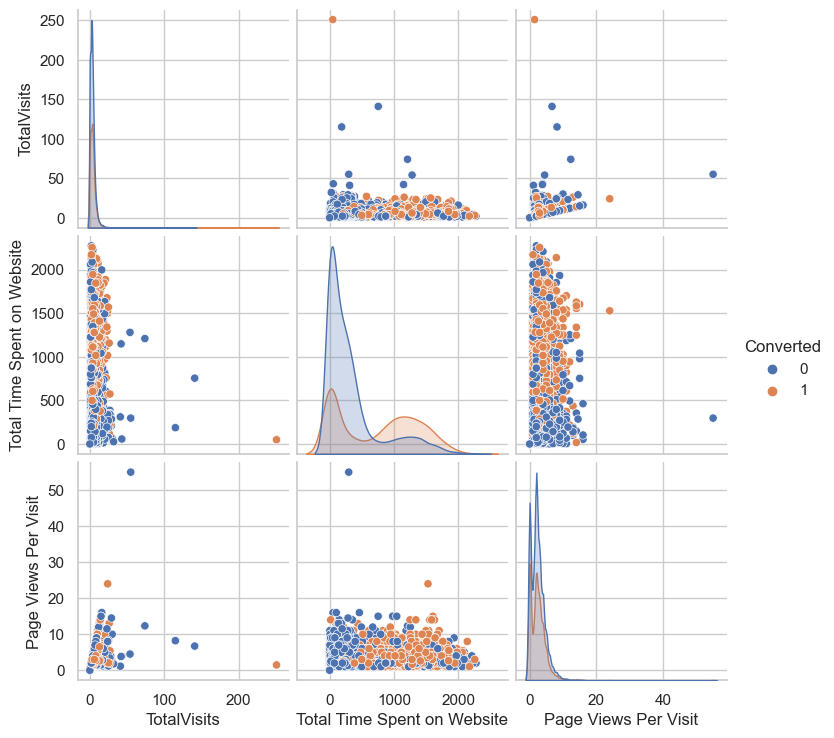

In [41]:
x_edu = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

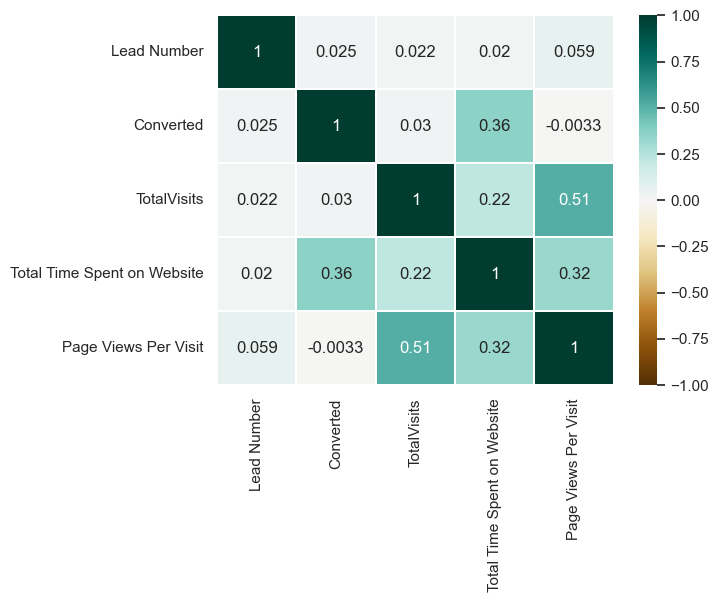

In [42]:

# Heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

# Visualizing Categorical Columns

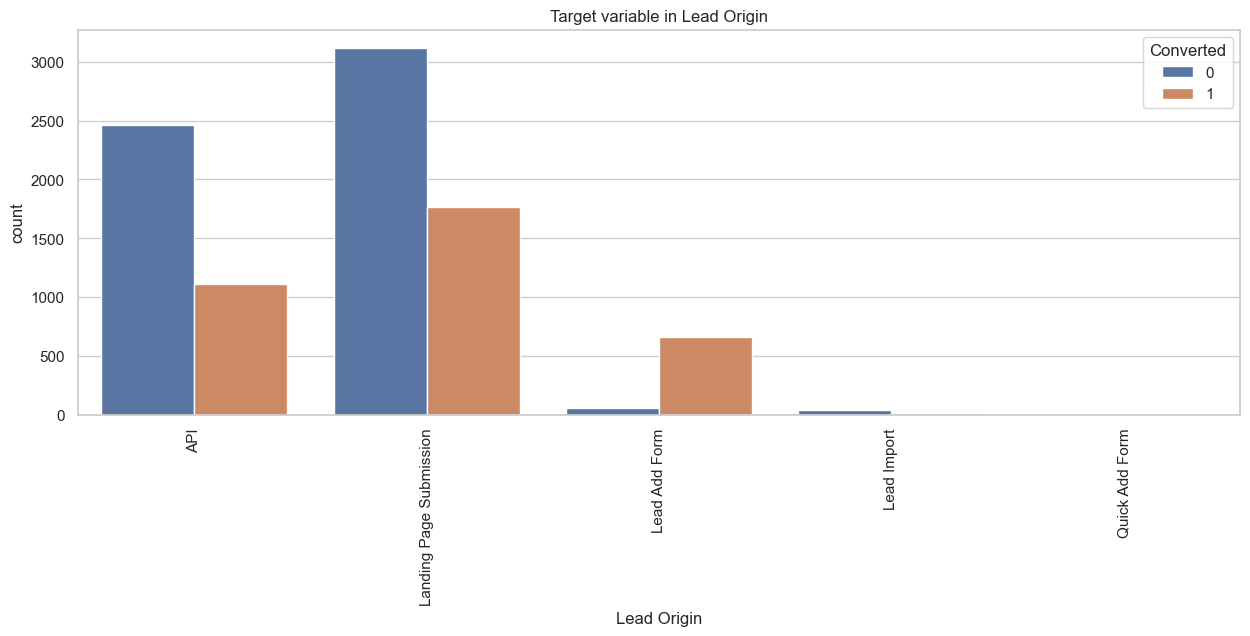

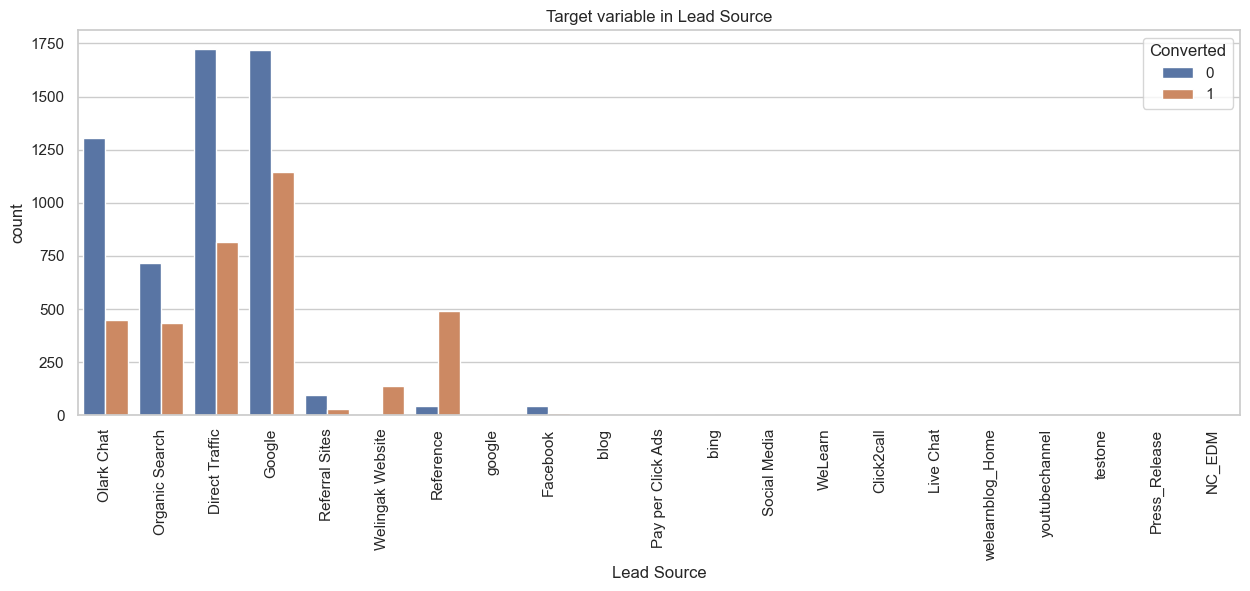

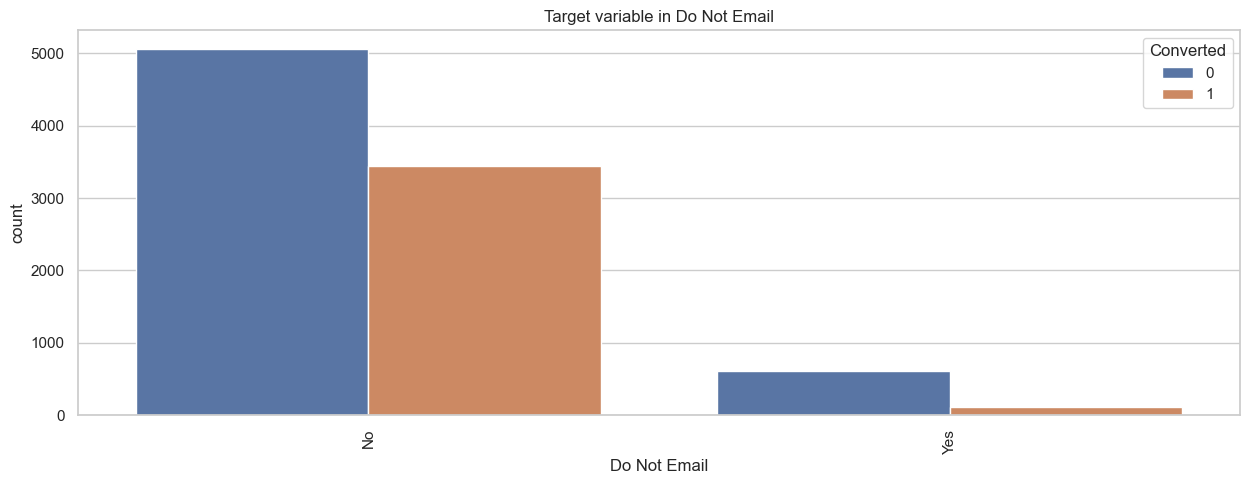

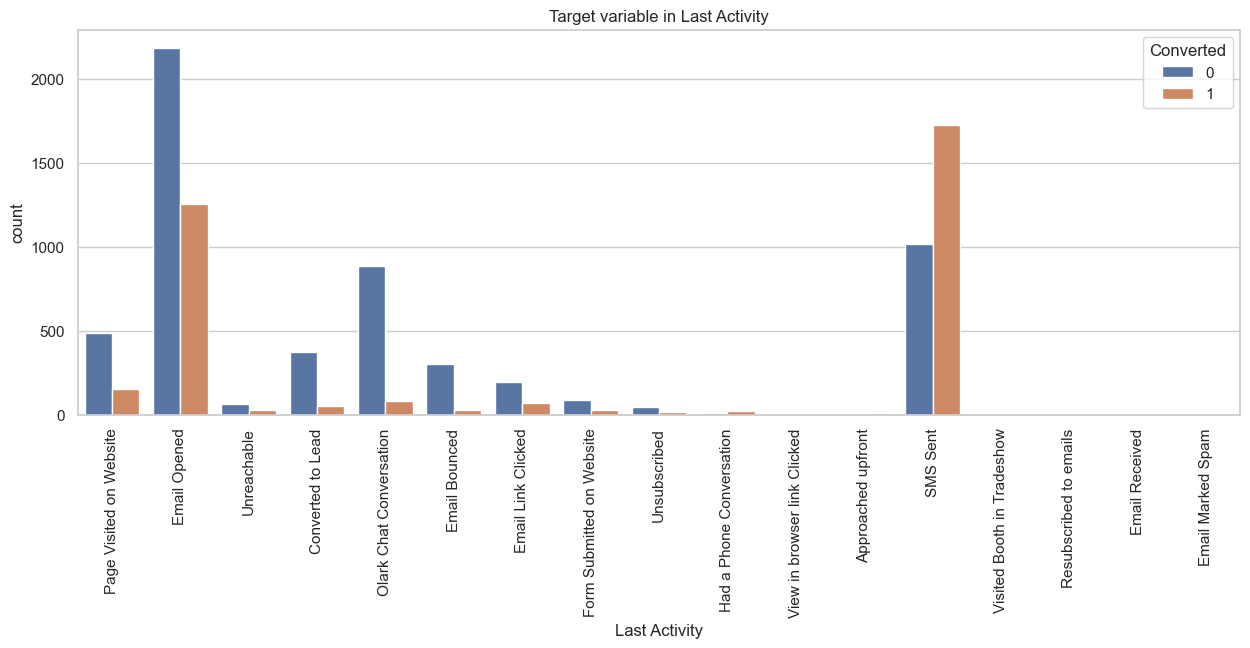

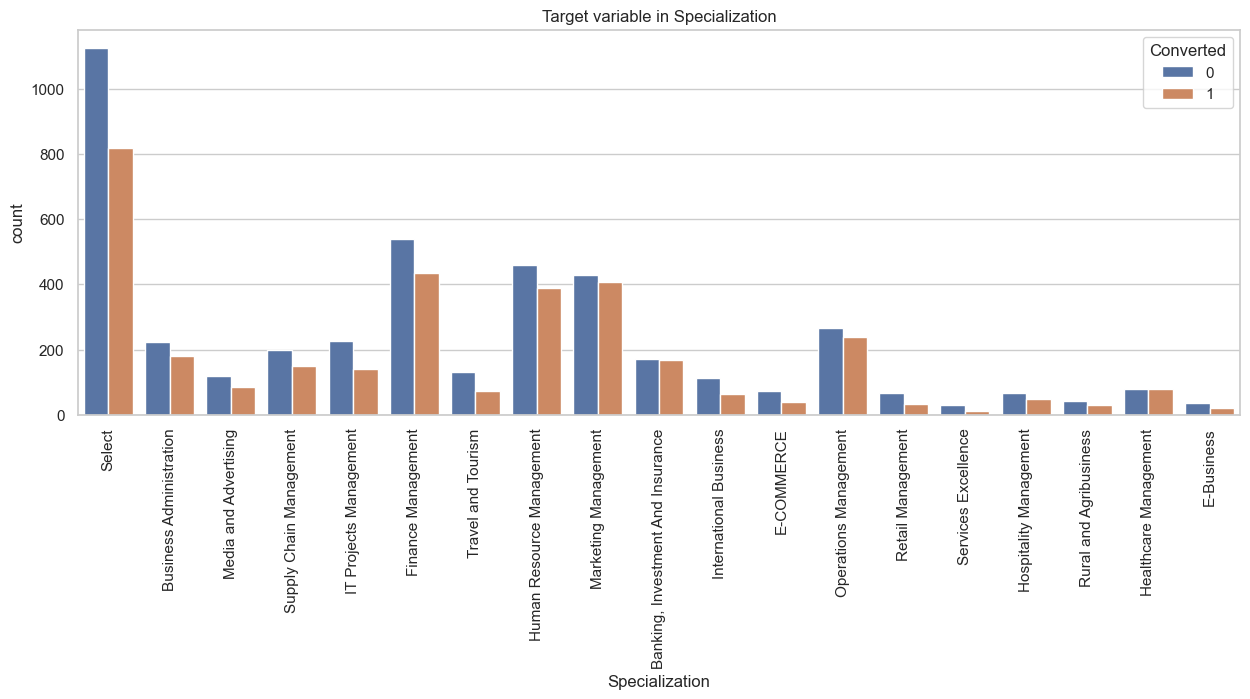

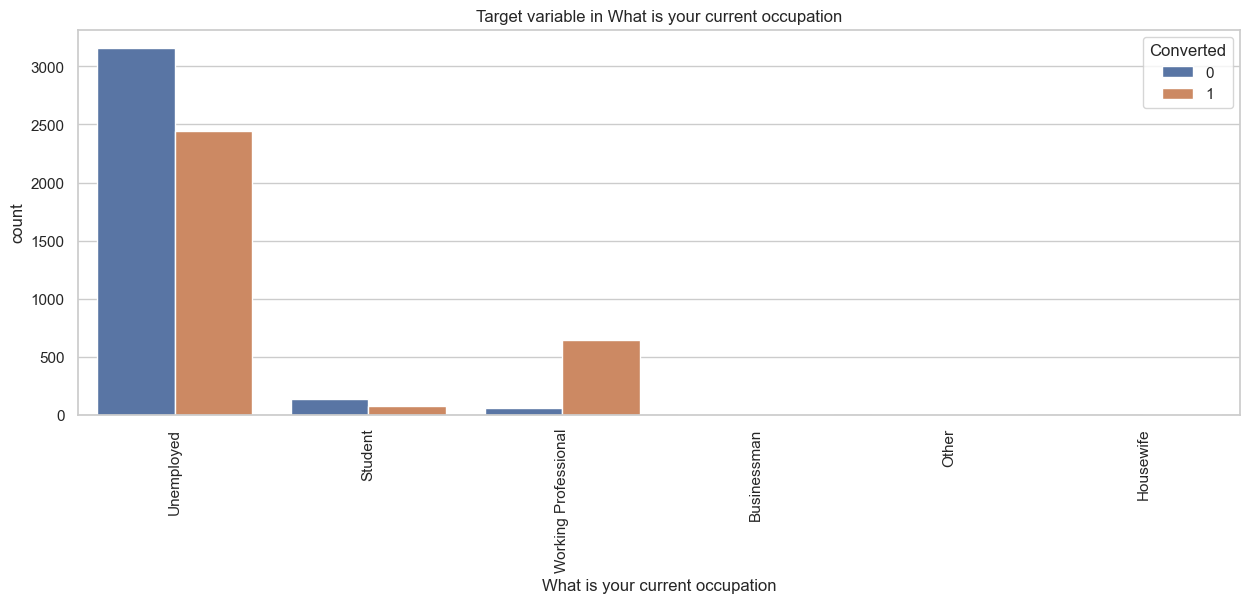

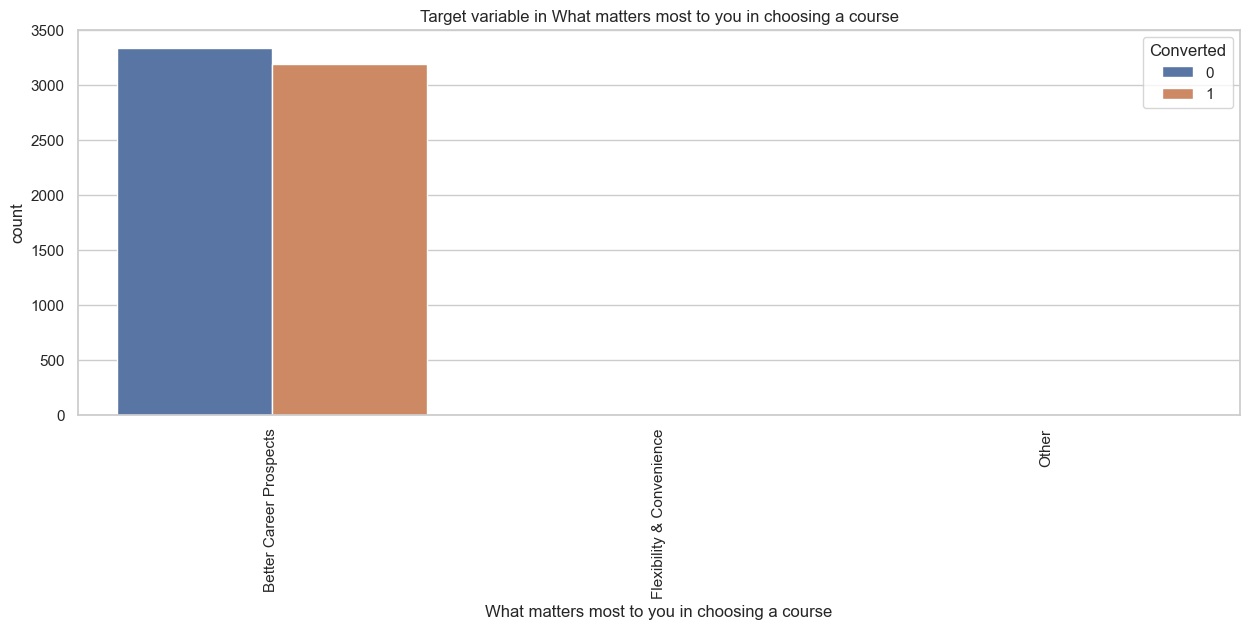

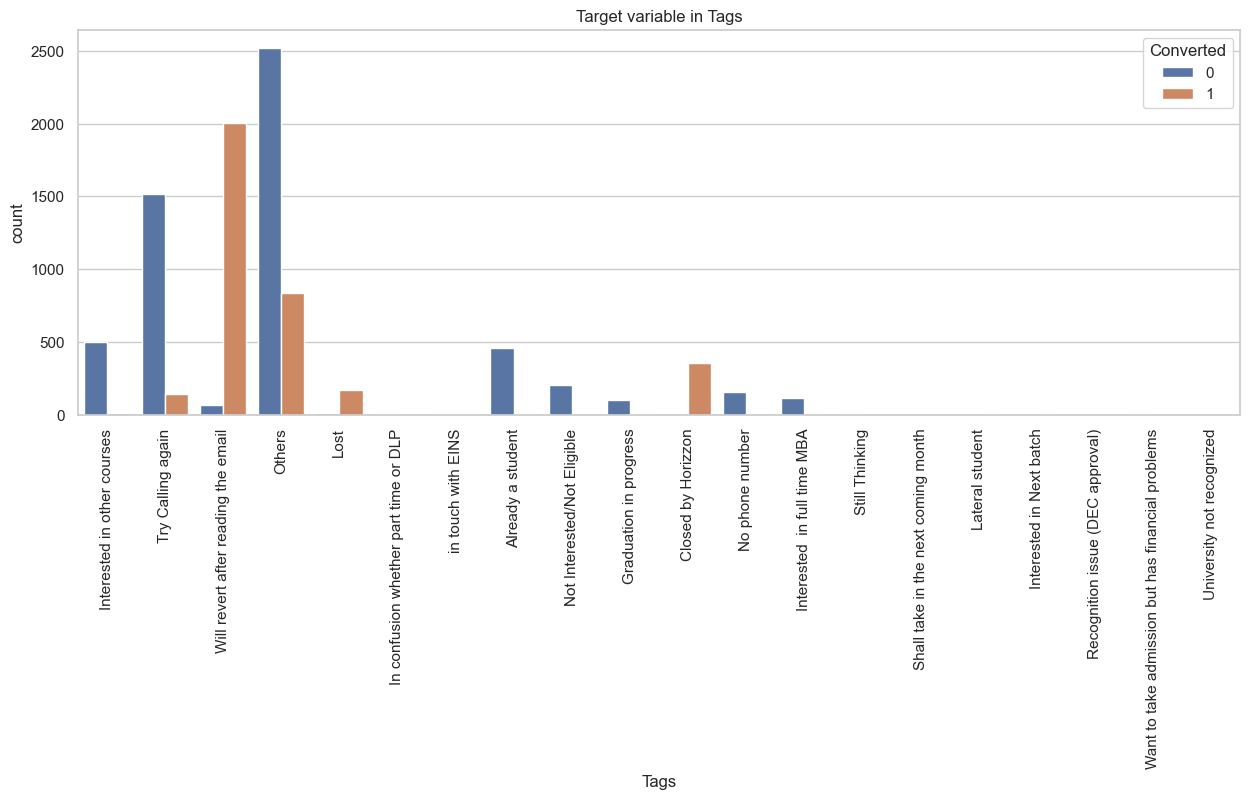

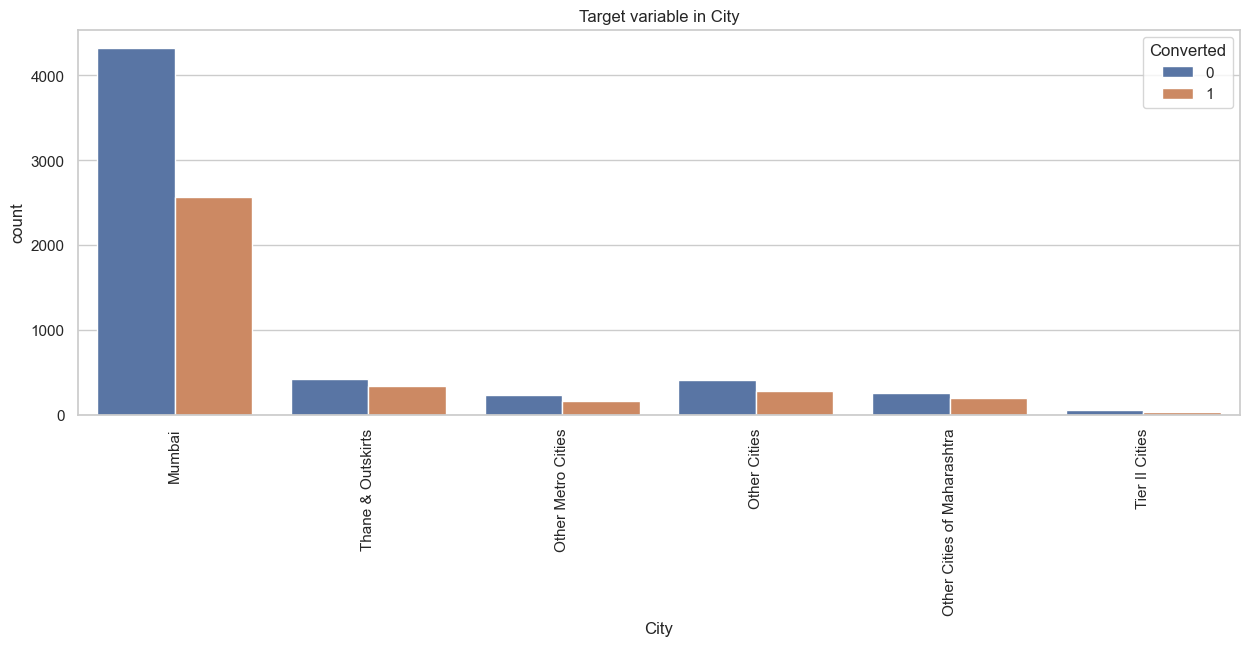

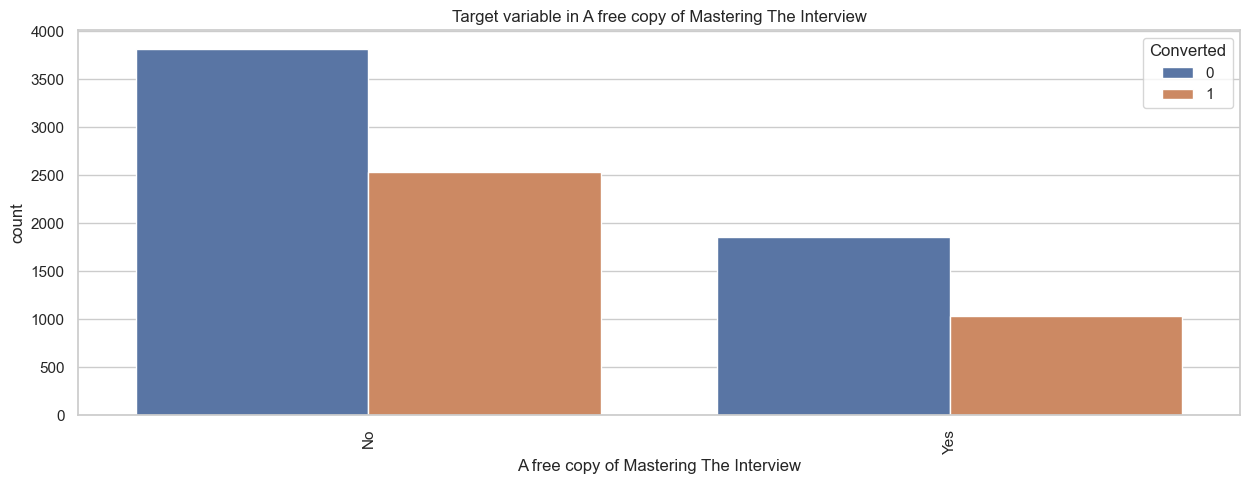

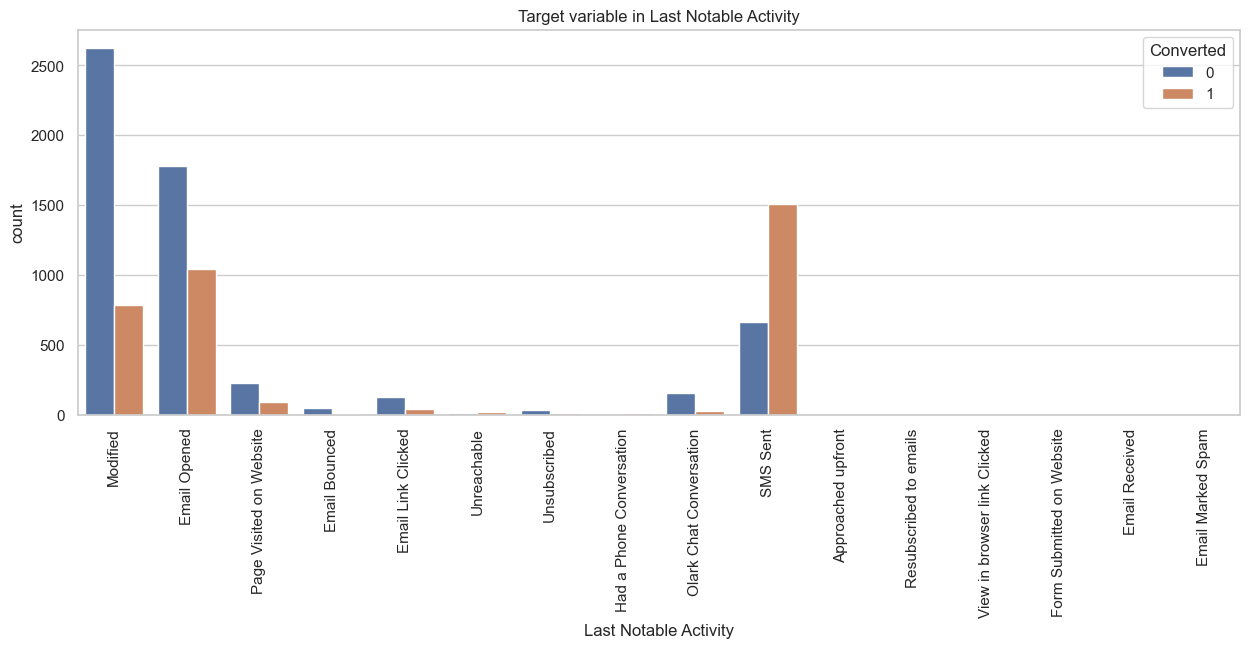

In [43]:
conv = df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(x=df[i], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [44]:
# Conclusion as per above graphs- Among Lead Origin- The people who landed to page submission got successfully converted,people mostly used google as source search engine,People who opened email and whom we sent message got converted as lead,Finance, HRM and Marketing management mostly converted as lead compared to other specialization,People who were unemployed mostly got converted as lead

In [45]:
# Checking Null Values in all the columns

In [46]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Tags                                                0
City                                                0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [47]:
df.drop(["What matters most to you in choosing a course"], axis=1,inplace= True )

In [48]:
df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
Tags                                         0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [49]:
# We are removing null values from "What is your current occupation" as it has most null values

In [50]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [51]:
df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [52]:
df = df[~pd.isnull(df['TotalVisits'])]

In [53]:
df = df[~pd.isnull(df['Page Views Per Visit'])]

In [54]:
df = df[~pd.isnull(df['Last Activity'])]

In [55]:
df = df[~pd.isnull(df['Lead Source'])]

In [56]:
df = df[~pd.isnull(df['Specialization'])]

In [57]:
df.isnull().sum().sort_values(ascending=False)

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [58]:
df.shape

(6373, 15)

# Data Preparation

In [59]:
df_new = df.copy()
#Converting Binary variables yes/No to 0 or 1

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [60]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
df_new[cols] = df_new[cols].apply(binary_map)

In [61]:
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [62]:
# Creating dummy variables for the categorical variables and droppong the first one
cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(df[cols1], drop_first= True)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [63]:
df_new = pd.concat([df_new,dummy1], axis =1)
df_new.shape

(6373, 108)

In [64]:
cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
df_new.drop(cols1, axis =1, inplace = True)
df_new.shape


(6373, 100)

In [65]:
y = df_new['Converted']
X = df_new.drop(['Converted','Lead Number'],axis = 1)

In [66]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [69]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 98)
y_train Size (4461,)


# Feature Scaling

In [70]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()  

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,0.064874,-0.824395,-0.223652,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0,0.064874,-0.611929,0.753710,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0,0.431907,-0.804919,1.731071,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0,-0.669191,-0.94

# Model Building

In [71]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4368
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 18 Nov 2023   Deviance:                       26618.
Time:                        17:11:23   Pearson chi2:                 1.30e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -2.835e+15   9.59e+07  -2.96e+07      0.000   -2.83e+15   -2.83e+15
Do Not Email                                           -1.977e+14   5.49e+06   -3.6e+07      0.000   -1.98e+14   -1.98e+14
TotalVisits                                             3.157e+13   1.18e+06   2.68e+07      0.000    3.16e+13    3.16e+13
Total Time Spent on Website                             5.573e+13   1.24e+06   4.51e+07      0.000    5.57e+13    5.57e+13
Page Views Per Visit                                   -3.336e+13   1.48e+06  -2.25e+07      0.000   -3.34e+13   -3.34e+13
A free copy of Mastering The Interview                  1.908e+13   3.13e+06    6.1e+06      0.000    1.91e+13    1.91e+13
Lead Origin_Landing Page Submission                    -8.256e+13   3.85e+06  -2.14e+07      0.000   -8.26e+13   -8.26e+13
Lead Origin_Lead Add Form                               3.397e+15   4.77e+07   7.11e+07      0.000     3.4e+15     3.4e+15
Lead Origin_Lead Import                                 3.219e+15   4.65e+07   6.92e+07      0.000    3.22e+15    3.22e+15
Lead Source_Direct Traffic                              6.444e+15   9.16e+07   7.03e+07      0.000    6.44e+15    6.44e+15
Lead Source_Facebook                                    3.219e+15   4.65e+07   6.92e+07      0.000    3.22e+15    3.22e+15
Lead Source_Google                                      6.526e+15   9.16e+07   7.12e+07      0.000    6.53e+15    6.53e+15
Lead Source_Live Chat                                    6.42e+15   9.15e+07   7.02e+07      0.000    6.42e+15    6.42e+15
Lead Source_Olark Chat                                  6.455e+15   9.16e+07   7.05e+07      0.000    6.45e+15    6.45e+15
Lead Source_Organic Search                              6.502e+15   9.16e+07    7.1e+07      0.000     6.5e+15     6.5e+15
Lead Source_Pay per Click Ads                            3.04e+15   1.14e+08   2.67e+07      0.000    3.04e+15    3.04e+15
Lead Source_Press_Release                               3.398e+15   1.14e+08   2.98e+07      0.000     3.4e+15     3.4e+15
Lead Source_Reference                                   2.687e+15   7.82e+07   3.44e+07      0.000    2.69e+15    2.69e+15
Lead Source_Referral Sites                              6.575e+15   9.21e+07   7.14e+07      0.000    6.57e+15    6.57e+15
Lead Source_Social Media                                  76.4848   1.26e-06   6.07e+07      0.000      76.485      76.485
Lead Source_WeLearn                                     1.008e+16   1.14e+08   8.86e+07      0.000    1.01e+16    1.01e+16
Lead Source_Welingak Website                             3.84e+15   7.85e+07   4.89e+07      0.000    3.84e+15    3.84e+15
Lead Sou

In [72]:
# Adopting RFE technique to select columns

In [73]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [74]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False])

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 56),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 47),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 77),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 71),
 ('Lead Source_Press_Release', False, 78),
 ('Lead Source_Reference', False, 46),
 ('Lead Source_Referral Sites', False, 70),
 ('Lead Source_Social Media', False, 84),
 ('Lead Source_WeLearn', False, 76),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_testone', False, 75),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activ

In [76]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lateral student', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Others',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [77]:
# Building Model using GLM TEchnique

# Model 1

In [78]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -853.88
Date:                Sat, 18 Nov 2023   Deviance:                       1707.8
Time:                        17:11:26   Pearson chi2:                 5.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6329
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.9974      0.133    -22.498      0.000      -3.258      -2.736
Do Not Email                                              -1.2658      0.288     -4.391      0.000      -1.831      -0.701
Lead Source_Welingak Website                               3.2843      1.021      3.216      0.001       1.283       5.286
Last Activity_SMS Sent                                     1.6176      0.150     10.764      0.000       1.323       1.912
Tags_Closed by Horizzon                                    8.5348      0.731     11.668      0.000       7.101       9.968
Tags_Interested in Next batch                             25.3923   3.88e+04      0.001      0.999   -7.61e+04    7.61e+04
Tags_Lateral student                                      26.0642   4.49e+04      0.001      1.000   -8.79e+04     8.8e+04
Tags_Lost                                                  6.1849      0.398     15.544      0.000       5.405       6.965
Tags_No phone number                                      -2.2694      1.015     -2.235      0.025      -4.259      -0.279
Tags_Others                                                3.6135      0.161     22.390      0.000       3.297       3.930
Tags_Want to take admission but has financial problems     3.1438      1.327      2.370      0.018       0.543       5.744
Tags_Will revert after reading the email                   6.5167      0.208     31.281      0.000       6.108       6.925
Tags_in touch with EINS                                    2.7162      0.817      3.326      0.001       1.116       4.317
Last Notable Activity_Had a Phone Conversation            21.1691   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
Last Notable Activity_Modified                            -1.4586      0.170     -8.583      0.000      -1.792      -1.126
Last Notable Activity_Olark Chat Conversation             -1.0868      0.479     -2.267      0.023      -2.026      -0.147
==========================================================================================================================
"""

In [79]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
2,Last Activity_SMS Sent,1.49
10,Tags_Will revert after reading the email,1.39
8,Tags_Others,1.23
13,Last Notable Activity_Modified,1.19
1,Lead Source_Welingak Website,1.15
0,Do Not Email,1.09
3,Tags_Closed by Horizzon,1.06
6,Tags_Lost,1.05
7,Tags_No phone number,1.05
9,Tags_Want to take admission but has financial problems,1.03


In [80]:
# Model 2

In [81]:
cols = cols.drop('Tags_Lateral student')
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -861.19
Date:                Sat, 18 Nov 2023   Deviance:                       1722.4
Time:                        17:11:26   Pearson chi2:                 5.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6317
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.9962      0.133    -22.529      0.000      -3.257      -2.736
Do Not Email                                              -1.2770      0.288     -4.441      0.000      -1.841      -0.713
Lead Source_Welingak Website                               3.2788      1.021      3.212      0.001       1.278       5.280
Last Activity_SMS Sent                                     1.6473      0.150     10.992      0.000       1.354       1.941
Tags_Closed by Horizzon                                    8.4950      0.731     11.623      0.000       7.063       9.927
Tags_Interested in Next batch                             24.3665   2.35e+04      0.001      0.999   -4.61e+04    4.62e+04
Tags_Lost                                                  6.1401      0.397     15.475      0.000       5.362       6.918
Tags_No phone number                                      -2.2966      1.015     -2.262      0.024      -4.286      -0.307
Tags_Others                                                3.5954      0.161     22.339      0.000       3.280       3.911
Tags_Want to take admission but has financial problems     3.0817      1.330      2.317      0.020       0.475       5.688
Tags_Will revert after reading the email                   6.4899      0.207     31.300      0.000       6.084       6.896
Tags_in touch with EINS                                    2.6870      0.816      3.294      0.001       1.088       4.286
Last Notable Activity_Had a Phone Conversation            20.2179   1.36e+04      0.001      0.999   -2.67e+04    2.68e+04
Last Notable Activity_Modified                            -1.4103      0.168     -8.390      0.000      -1.740      -1.081
Last Notable Activity_Olark Chat Conversation             -1.0689      0.479     -2.233      0.026      -2.007      -0.131
==========================================================================================================================
"""

In [82]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
2,Last Activity_SMS Sent,1.488145
9,Tags_Will revert after reading the email,1.388859
7,Tags_Others,1.226831
12,Last Notable Activity_Modified,1.184938
1,Lead Source_Welingak Website,1.147760
0,Do Not Email,1.092127
3,Tags_Closed by Horizzon,1.060456
6,Tags_No phone number,1.047033
5,Tags_Lost,1.045007
11,Last Notable Activity_Had a Phone Conversation,1.034512


In [83]:
# Model 3

In [84]:
cols = cols.drop("Last Notable Activity_Had a Phone Conversation")
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -861.97
Date:                Sat, 18 Nov 2023   Deviance:                       1723.9
Time:                        17:15:00   Pearson chi2:                 5.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6316
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.9914      0.133    -22.529      0.000      -3.252      -2.731
Do Not Email                                              -1.2780      0.288     -4.441      0.000      -1.842      -0.714
Lead Source_Welingak Website                               3.2799      1.021      3.212      0.001       1.279       5.281
Last Activity_SMS Sent                                     1.6422      0.150     10.965      0.000       1.349       1.936
Tags_Closed by Horizzon                                    8.5012      0.731     11.630      0.000       7.069       9.934
Tags_Interested in Next batch                             23.3674   1.43e+04      0.002      0.999    -2.8e+04     2.8e+04
Tags_Lost                                                  6.1475      0.397     15.487      0.000       5.369       6.925
Tags_No phone number                                      -2.2963      1.015     -2.262      0.024      -4.286      -0.306
Tags_Others                                                3.5952      0.161     22.336      0.000       3.280       3.911
Tags_Want to take admission but has financial problems     3.6498      1.085      3.365      0.001       1.524       5.776
Tags_Will revert after reading the email                   6.4994      0.207     31.339      0.000       6.093       6.906
Tags_in touch with EINS                                    2.6893      0.816      3.296      0.001       1.090       4.289
Last Notable Activity_Modified                            -1.4238      0.168     -8.476      0.000      -1.753      -1.095
Last Notable Activity_Olark Chat Conversation             -1.0750      0.479     -2.244      0.025      -2.014      -0.136
==========================================================================================================================
"""

In [85]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
2,Last Activity_SMS Sent,1.484725
9,Tags_Will revert after reading the email,1.377021
7,Tags_Others,1.226597
11,Last Notable Activity_Modified,1.184571
1,Lead Source_Welingak Website,1.147757
0,Do Not Email,1.092117
3,Tags_Closed by Horizzon,1.060419
6,Tags_No phone number,1.046978
5,Tags_Lost,1.044964
12,Last Notable Activity_Olark Chat Conversation,1.016374


In [86]:
# Model 4

In [87]:
cols = cols.drop("Tags_Interested in Next batch")
logreg4 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -869.32
Date:                Sat, 18 Nov 2023   Deviance:                       1738.6
Time:                        17:16:15   Pearson chi2:                 5.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6304
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.9796      0.132    -22.525      0.000      -3.239      -2.720
Do Not Email                                              -1.2151      0.284     -4.277      0.000      -1.772      -0.658
Lead Source_Welingak Website                               3.2735      1.021      3.206      0.001       1.272       5.275
Last Activity_SMS Sent                                     1.6686      0.149     11.180      0.000       1.376       1.961
Tags_Closed by Horizzon                                    8.4918      0.731     11.619      0.000       7.059       9.924
Tags_Lost                                                  6.1381      0.397     15.471      0.000       5.360       6.916
Tags_No phone number                                      -2.3347      1.015     -2.300      0.021      -4.324      -0.345
Tags_Others                                                3.5747      0.161     22.252      0.000       3.260       3.890
Tags_Want to take admission but has financial problems     3.6371      1.086      3.348      0.001       1.508       5.766
Tags_Will revert after reading the email                   6.4821      0.207     31.285      0.000       6.076       6.888
Tags_in touch with EINS                                    2.6733      0.817      3.270      0.001       1.071       4.275
Last Notable Activity_Modified                            -1.4311      0.168     -8.540      0.000      -1.760      -1.103
Last Notable Activity_Olark Chat Conversation             -1.0705      0.479     -2.237      0.025      -2.009      -0.133
==========================================================================================================================
"""

In [88]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
2,Last Activity_SMS Sent,1.479403
8,Tags_Will revert after reading the email,1.375697
6,Tags_Others,1.226306
10,Last Notable Activity_Modified,1.184516
1,Lead Source_Welingak Website,1.147730
0,Do Not Email,1.091474
3,Tags_Closed by Horizzon,1.060418
5,Tags_No phone number,1.046848
4,Tags_Lost,1.044958
11,Last Notable Activity_Olark Chat Conversation,1.016366


### Variance Inflation Factor is less than 2. VIF value below 2 indicates a low level of multicollinearity.

In [90]:
print("The final Variables selected are:")
cols

The final Variables selected are:


Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Others',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [91]:
# Making Predictions of Train- set

In [92]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.212328
218     0.012001
4171    0.888094
4037    0.644538
3660    0.994354
207     0.012001
2044    0.302372
6411    0.983392
6498    0.003591
2085    0.979540
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21232753, 0.01200082, 0.88809358, 0.64453818, 0.99435413,
       0.01200082, 0.30237159, 0.98339216, 0.00359061, 0.97954045])

In [94]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,8003,0,0.212328
1,218,0,0.012001
2,4171,1,0.888094
3,4037,1,0.644538
4,3660,1,0.994354


In [95]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,8003,0,0.212328,0
1,218,0,0.012001,0
2,4171,1,0.888094,1
3,4037,1,0.644538,1
4,3660,1,0.994354,1


In [96]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[2186  126]
 [ 165 1984]]


In [97]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2312
           1       0.94      0.92      0.93      2149

    accuracy                           0.93      4461
   macro avg       0.94      0.93      0.93      4461
weighted avg       0.93      0.93      0.93      4461



In [98]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9232201023731968

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.9455017301038062

In [101]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.054498269896193774


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.9402843601895735


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9298170991067631


In [104]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

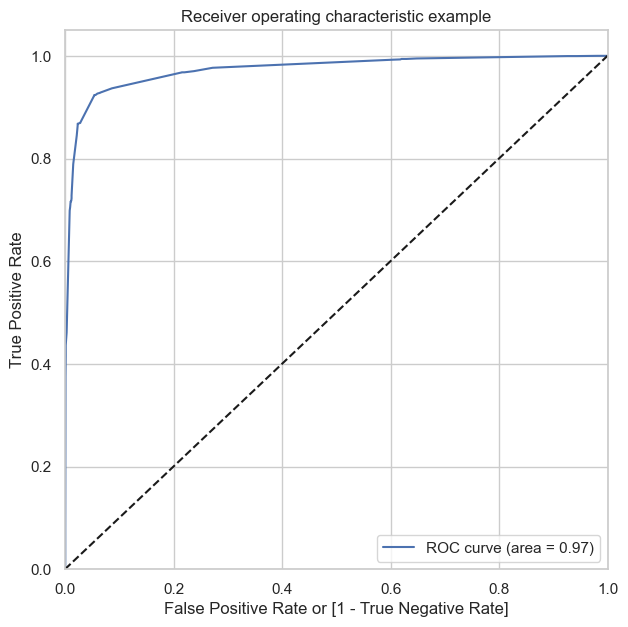

In [105]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# Finding optimal Cutt Off- point

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,8003,0,0.212328,0,1,1,1,0,0,0,0,0,0,0
1,218,0,0.012001,0,1,0,0,0,0,0,0,0,0,0
2,4171,1,0.888094,1,1,1,1,1,1,1,1,1,1,0
3,4037,1,0.644538,1,1,1,1,1,1,1,1,0,0,0
4,3660,1,0.994354,1,1,1,1,1,1,1,1,1,1,1


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.870433  0.967892  0.779844
0.2   0.2  0.873347  0.967427  0.785900
0.3   0.3  0.924681  0.936715  0.913495
0.4   0.4  0.934095  0.923685  0.943772
0.5   0.5  0.934768  0.923220  0.945502
0.6   0.6  0.934768  0.923220  0.945502
0.7   0.7  0.923560  0.868311  0.974913
0.8   0.8  0.922439  0.864123  0.976644
0.9   0.9  0.890159  0.788274  0.984862


<Figure size 1200x600 with 0 Axes>

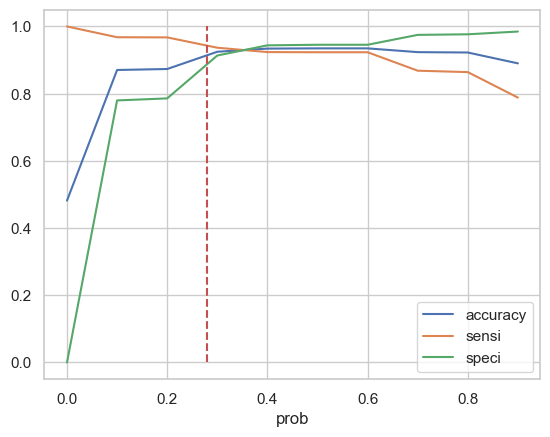

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [109]:
#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,8003,0,0.212328,0,1,1,1,0,0,0,0,0,0,0,0
1,218,0,0.012001,0,1,0,0,0,0,0,0,0,0,0,0
2,4171,1,0.888094,1,1,1,1,1,1,1,1,1,1,0,1
3,4037,1,0.644538,1,1,1,1,1,1,1,1,0,0,0,1
4,3660,1,0.994354,1,1,1,1,1,1,1,1,1,1,1,1


In [110]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,8003,0,0.212328,0,1,1,1,0,0,0,0,0,0,0,0,21
1,218,0,0.012001,0,1,0,0,0,0,0,0,0,0,0,0,1
2,4171,1,0.888094,1,1,1,1,1,1,1,1,1,1,0,1,89
3,4037,1,0.644538,1,1,1,1,1,1,1,1,0,0,0,1,64
4,3660,1,0.994354,1,1,1,1,1,1,1,1,1,1,1,1,99


In [111]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9246805648957633

In [112]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2112,  200],
       [ 136, 2013]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9367147510469986


In [115]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.9134948096885813


In [116]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.08650519031141868
Positive Predictive rate: 0.9096249435155896
Negative Predictive rate: 0.9395017793594306


In [117]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2312
           1       0.91      0.94      0.92      2149

    accuracy                           0.92      4461
   macro avg       0.92      0.93      0.92      4461
weighted avg       0.93      0.92      0.92      4461



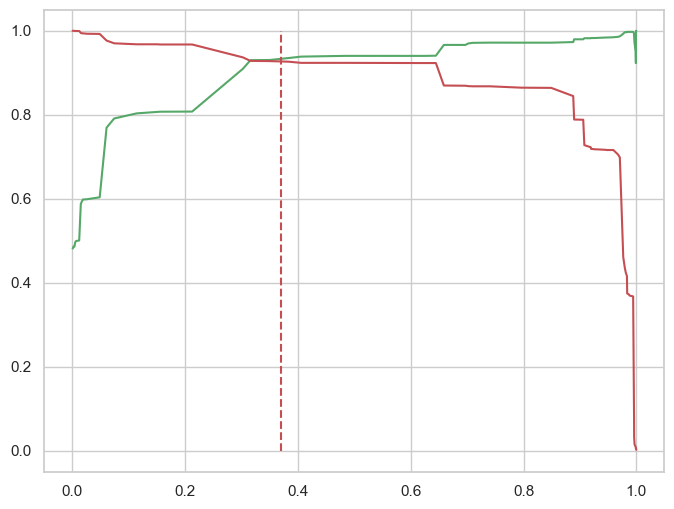

In [118]:
##precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

0.38 is the tradeoff between Precision and Recall -
Thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 38 % to be a hot Lead

# Making Predictions on Test Set

In [119]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4771,0,-0.669191,-0.943022,-1.201013,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,0,0.615423,-0.826165,2.219752,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9202,0,0.064874,0.733689,0.753710,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6570,1,-0.118642,0.581422,0.265029,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2668,0,0.798939,0.64693

In [120]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4771,0,0,1,0,0,0,0,0,1,0,0,0
6122,0,0,0,0,0,0,0,0,0,0,0,0
9202,0,0,1,0,0,0,0,0,0,0,0,0
6570,1,0,1,0,0,0,0,0,1,0,0,0
2668,0,0,1,0,0,0,0,0,0,0,1,0


In [121]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [122]:
#Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4771    0.994354
6122    0.048358
9202    0.212328
6570    0.981221
2668    0.060534
4233    0.981221
3368    0.048358
9091    0.048358
5972    0.976798
3631    0.994354
dtype: float64

In [123]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [124]:
y_pred_df.head()

,0
4771,0.994354
6122,0.048358
9202,0.212328
6570,0.981221
2668,0.060534


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,4771,0.994354
1,0,6122,0.048358
2,0,9202,0.212328
3,1,6570,0.981221
4,1,2668,0.060534


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)

In [131]:
y_pred_final.head()


,Lead ID,Converted,Converted_prob
0,4771,1,0.994354
1,6122,0,0.048358
2,9202,0,0.212328
3,6570,1,0.981221
4,2668,1,0.060534


In [132]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,4771,1,0.994354,99
1,6122,0,0.048358,5
2,9202,0,0.212328,21
3,6570,1,0.981221,98
4,2668,1,0.060534,6


In [133]:
#Taking 0.38 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [134]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,4771,1,0.994354,99,1
1,6122,0,0.048358,5,0
2,9202,0,0.212328,21,0
3,6570,1,0.981221,98,1
4,2668,1,0.060534,6,0


In [135]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.9435146443514645


In [136]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[944,  52],
       [ 56, 860]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.9388646288209607


In [139]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.9477911646586346


In [140]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       996
           1       0.94      0.94      0.94       916

    accuracy                           0.94      1912
   macro avg       0.94      0.94      0.94      1912
weighted avg       0.94      0.94      0.94      1912



### Final Observation

Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 91.23%
Sensitivity : 93.6%
Specificity : 91.3%
Precision : 91%
Recall : 94%

Test Data:

Accuracy : 94%
Sensitivity :93.8%
Specificity : 94.7%
Precision : 94%
Recall : 94%

The Model seems to predict the Conversion Rate very well. We should be able to help the education company select the Hot Leads.

# Conclusion

In [142]:
## Let us concatinate predictiona made on test & train dataset
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,588514,0,0.212328,21,0,Landing Page Submission,Direct Traffic,No,4.0,67,2.0,SMS Sent,IT Projects Management,Unemployed,Try Calling again,Mumbai,Yes,SMS Sent
1,658206,0,0.012001,1,0,Landing Page Submission,Direct Traffic,No,4.0,187,4.0,Email Link Clicked,Human Resource Management,Unemployed,Try Calling again,Mumbai,Yes,Modified
2,619890,1,0.888094,89,1,Landing Page Submission,Direct Traffic,No,6.0,78,6.0,Page Visited on Website,Travel and Tourism,Unemployed,Will revert after reading the email,Thane & Outskirts,Yes,Modified
3,621270,1,0.644538,64,1,API,Olark Chat,No,0.0,0,0.0,Email Opened,Select,Unemployed,Others,Mumbai,No,Email Opened
4,625185,1,0.994354,99,1,Lead Add Form,Reference,No,0.0,0,0.0,SMS Sent,Finance Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,SMS Sent


In [143]:
all_leads.shape

(6373, 18)

In [144]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
5148,598132,1,0.995979,100,1,Lead Add Form,Reference,No,0.0,0,0.0,Email Opened,Human Resource Management,Working Professional,Closed by Horizzon,Mumbai,No,Email Opened
2251,621116,1,0.996078,100,1,Lead Add Form,Welingak Website,No,0.0,0,0.0,SMS Sent,Select,Unemployed,Others,Mumbai,No,SMS Sent
613,594531,1,0.995979,100,1,Landing Page Submission,Direct Traffic,No,2.0,111,2.0,Email Opened,Healthcare Management,Working Professional,Closed by Horizzon,Mumbai,Yes,Email Opened
3127,654136,1,0.999101,100,1,Lead Add Form,Welingak Website,No,0.0,0,0.0,SMS Sent,Healthcare Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,Modified
3129,601680,1,0.995979,100,1,Lead Add Form,Reference,No,0.0,0,0.0,Email Opened,Select,Unemployed,Closed by Horizzon,Mumbai,No,Email Opened


In [145]:
Hot_leads.shape

(2742, 18)

In [148]:
# Concatinating columns from FINAL regression model and lead score on train & test Data

#Concatinating predictions on train & test data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

# concatinating Variables selected in our final regression model
lead_score = pd.merge(lead_score,df_new[cols].reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head(10)

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4834,7089,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
2526,913,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
2137,5698,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
1442,2918,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
2130,2457,1,0.996078,100,1,0,1,1,0,0,0,1,0,0,0,0,0
4149,2368,1,0.996826,100,1,0,0,1,1,0,0,0,0,0,0,1,0
2120,7845,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
4146,2688,1,0.999785,100,1,0,1,1,0,0,0,0,0,1,0,0,0
2115,5293,1,0.995979,100,1,0,0,0,1,0,0,0,0,0,0,0,0
2110,3355,1,0.996078,100,1,0,1,1,0,0,0,1,0,0,0,0,0


In [147]:
lead_score.shape

(6373, 17)

## Conclusion

### When the Company has limited time and resources, it should approach Hot_leads i.e. those leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.

In [155]:
Hot_leads["Lead Source"].value_counts(sort= True)

Google              884
Direct Traffic      645
Reference           411
Organic Search      343
Olark Chat          292
Welingak Website    129
Referral Sites       23
Facebook              8
Live Chat             2
Click2call            2
WeLearn               1
bing                  1
Social Media          1
Name: Lead Source, dtype: int64

In [156]:
Hot_leads["Lead Origin"].value_counts(sort= True)

Landing Page Submission    1416
API                         772
Lead Add Form               546
Lead Import                   8
Name: Lead Origin, dtype: int64

In [160]:
Hot_leads["What is your current occupation"].value_counts(sort= True)

Unemployed              2019
Working Professional     627
Student                   73
Housewife                  9
Other                      9
Businessman                5
Name: What is your current occupation, dtype: int64

In [161]:
Hot_leads["Specialization"].value_counts(sort= True)

Select                               588
Finance Management                   371
Marketing Management                 335
Human Resource Management            323
Operations Management                193
Banking, Investment And Insurance    142
Business Administration              142
Supply Chain Management              133
IT Projects Management               115
Media and Advertising                 71
Healthcare Management                 66
Travel and Tourism                    65
International Business                49
Hospitality Management                39
E-COMMERCE                            31
Rural and Agribusiness                27
Retail Management                     27
E-Business                            17
Services Excellence                    8
Name: Specialization, dtype: int64

In [162]:
Hot_leads["Last Activity"].value_counts(sort= True)

SMS Sent                     1372
Email Opened                  983
Page Visited on Website       126
Email Link Clicked             62
Olark Chat Conversation        56
Converted to Lead              49
Unreachable                    27
Form Submitted on Website      20
Had a Phone Conversation       19
Unsubscribed                   11
Email Bounced                   8
Approached upfront              5
Email Received                  2
Email Marked Spam               2
Name: Last Activity, dtype: int64